# Ejemplos de K-medias en kaggle.com

Un ejemplo similar a las metricas de evaluacion que aplicaremos a nuestra base de datos se encuentra en el siguiente enlace:  
[Ejemlo](https://www.kaggle.com/achintyatripathi/kmeans-from-scratch-with-silhoutte-and-elbow-curve)

Haciendo uso de la librería **sklearn** e importando **silhouette_score**, tenemos el ejemplo que se muestra a continuación:

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
import random

In [4]:
# crear blobs
data = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=.9, )

(array([[ -9.27391038,  -5.30558673],
        [  7.48455002,   4.56837376],
        [ 10.68819977,   3.82828103],
        [ -9.26059965,  -5.47078541],
        [ -1.44275581,   5.58577078],
        [  7.50720643,   3.9784377 ],
        [ -2.00649566,   5.94152277],
        [ -7.73437141,  -5.20185371],
        [ -9.14200694,  -5.68681157],
        [ -1.81379931,   5.17277014],
        [ -1.99854744,   5.83683805],
        [ -2.78292494,   5.45810647],
        [ -8.96952539,  -3.45967407],
        [  6.81242293,   3.3848366 ],
        [  9.13772965,   3.32550735],
        [ -2.82117158,   5.18256083],
        [ -8.51261818,  -5.55315206],
        [ -9.07445469,  -4.32371072],
        [ -9.17943662,  -4.78504158],
        [ -0.93220026,   5.89670529],
        [ -9.83083122,  -3.13975242],
        [  9.82521991,   5.2518948 ],
        [  7.50153251,   3.41196427],
        [ -2.15079363,   3.73515135],
        [ -8.4871056 ,  -5.45545054],
        [ -8.56880746,  -4.57434427],
        [ -2

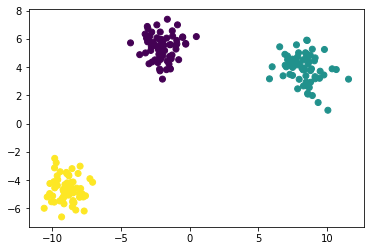

In [5]:
# crear scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')

### Funciones globales requeridas

In [9]:
import scipy.spatial.distance as metric

def euclidean_dist(A, B):
    return metric.euclidean(A, B)

def plot(data,k,index,centroids,orig_centroids):
    input = []
    for i in range(len(index)):
        for j in index[i]:
            input.append(int(j))
            
    colors = 10*["g","r","c","b","k"]
    j=0
    for i in input:
        plt.scatter(data[0][j,0], data[0][j,1], marker="x", color=colors[i], s=150, linewidths=5)
        j+=1
    ## New centroids
    for centroid in range(len(centroids)):
        plt.scatter(centroids[centroid][0],centroids[centroid][1],marker="o", color="k", s=150, linewidths=5)
    # Original Clusters
    for centroid in range(len(orig_centroids)):
        plt.scatter(orig_centroids[centroid][0],orig_centroids[centroid][1],marker="D", color="DarkBlue", s=150, linewidths=5)

### Función de K-medias

In [7]:
class K_Means:
    def __init__(self,k,data,centeriod_init=None):
        self.k = k
        self.data = data  
        self.centeriod_init = centeriod_init
        
    def initialise_centroids(self,centeriod_init,k,data):
        ## 3 formas de inicializar centroides
        if(self.centeriod_init == 'random'): 
            initial_centroids = np.random.permutation(data.shape[0])[:self.k]
            self.centroids = data[initial_centroids]
        elif(self.centeriod_init == 'firstk'):
            self.centroids = data[:k]
        else:
            for i in range(self.k):
                self.centroids.append(i%self.k)
        return self.centroids    
 
    def fit(self,data):
        m = np.shape(data)[0]
        cluster_assignments = np.mat(np.zeros((m,2)))
        
        cents = self.initialise_centroids(self.centeriod_init,self.k,data)
        
        # Conservar centroides originales
        cents_orig = cents.copy()
        changed = True
        num_iter = 0
        
        while changed and num_iter<100:
            changed = False 
            # for de cada columna en la base de datos
            for i in range(m):
                # Seguimiento de la distancia mínima y el índice vectorial del grupo asociado
                min_dist = np.inf
                min_index = -1 
                # calcula la distancia
                for j in range(self.k):
                    dist_ji = euclidean_dist(cents[j,:],data[i,:])
                    if(dist_ji < min_dist):
                        min_dist = dist_ji
                        min_index = j 
                    # Checa si ha cambiado la asignación cluster de la instancia
                    if cluster_assignments[i, 0] != min_index: 
                        changed = True

                # Asigna instancia al cluster apropiado
                cluster_assignments[i, :] = min_index, min_dist**2

            # Actualiza la ubicación del cluster
            for cent in range(self.k):
                points = data[np.nonzero(cluster_assignments[:,0].A==cent)[0]]
                cents[cent,:] = np.mean(points, axis=0)
    
            # Cuenta las iteraciones
            num_iter += 1
            #print(num_iter)

         # Regresa los valores que necesitamos
        return cents, cluster_assignments, num_iter, cents_orig

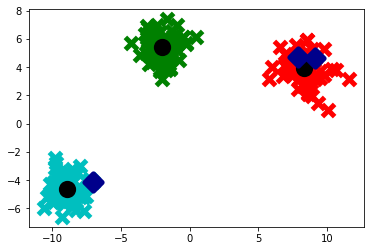

In [10]:
# Realizar agrupación de k-medias con centroides inicializados en 'random'
kmeans = K_Means(k=3,data = data[0],centeriod_init='random')
centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(data[0])
index = cluster_assignments[:,0] ## Esto tiene la asignación cluster de 0,1,.... 
distance = cluster_assignments[:,1]  ## Esto tiene la distancia de sus respectivos centroides para fines de evaluación
k=3
plot(data,k,index,centroids,orig_centroids)

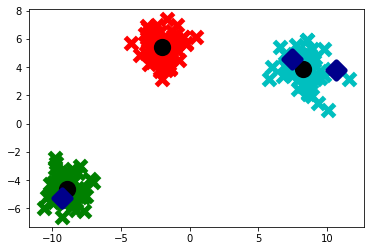

In [11]:
# Realizar agrupación de k-medias con centroides inicializados en 'firstk'
kmeans = K_Means(k=3,data = data[0],centeriod_init='firstk')
centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(data[0])
index = cluster_assignments[:,0] ## Esto tiene la asignación cluster de 0,1,.... 
distance = cluster_assignments[:,1]  ## Esto tiene la distancia de sus respectivos centroides para fines de evaluación 
k=3
plot(data,k,index,centroids,orig_centroids)

Como podemos observar en las gráficas, el modelo puede clasificar los puntos de nuestra base en diferentes grupos cluster. Sin embargo buscamos cómo definir el valor de 'K'. Este valor lo podemos encontrar por medio de una ***Elbow curve*** o ***Silhoutte Score***

## Elbow curve

Text(0, 0.5, 'Dispersión')

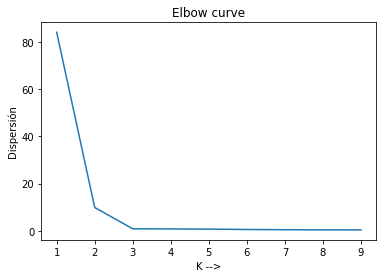

In [13]:
costs = []
for i in range(10):
    kmeans = K_Means(k=i,data = data[0],centeriod_init='firstk')
    centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(data[0])
    distance = cluster_assignments[:,1]  ## Esto tiene la distancia de sus respectivos centroides para fines de evaluación 
    cost = sum(distance)/(2*len(data[0]))
    cost = np.array(cost)
    cost =  cost.item()
    costs.append(cost)
    
x = np.arange(10)
plt.plot(x,costs)
plt.title("Elbow curve")
plt.xlabel("K -->")
plt.ylabel("Dispersión")

Con la gráfica anterior podemos ver claramente que en K=3, la distancia entre grupos cluster está formando grupos válidos.

## Silhoutte Score

<ipython-input-14-d0d31ec22556>:15: RuntimeWarning: invalid value encountered in true_divide
  s = (dist_ji - a)/max(dist_ji,a)


Text(0, 0.5, 'Dispersión')

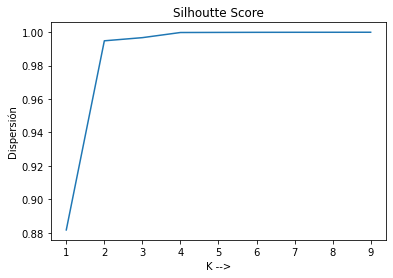

In [14]:
costs = []
for p in range(10):
    kmeans = K_Means(k=p,data = data[0],centeriod_init='random')
    centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(data[0])
    X = data[0]
    dist_ji = 0
    a = 0
    s=0
    for i in range(len(data[0])):
        for j in range(p):
            dist_ji += euclidean_dist(centroids[j,:],X[i,:])
            #print(dist_ji)
    dist_ji -= sum(cluster_assignments[:,1])/len(data[0])
    a = sum(cluster_assignments[:,1])/(len(data[0])-1)
    s = (dist_ji - a)/max(dist_ji,a)
    s = np.array(s)
    s =  s.item()
    costs.append(s)
x = np.arange(10)
plt.plot(x,costs)
plt.title("Silhoutte Score")
plt.xlabel("K -->")
plt.ylabel("Dispersión")

En este caso podemos ver que es hasta K=4 cuando la distancia entre grupos cluster forma grupos válidos.  
Por lo tanto, por medio de múltiples iteraciones podemos obtener estos valores de 'K'.

## Iteraciones

En el siguiente caso, asignaremos diferentes valores de 'K' para observar cómo se vería un modelo completo:

Text(0, 0.5, 'Dispersion')

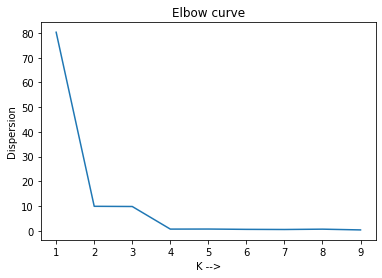

In [23]:
costs = []
indexs = []
Clusters = []
centroid = []
orig_centroid = []
for i in range(10):
    kmeans = K_Means(k=i,data = data[0],centeriod_init='random')
    centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(data[0])
    
    centroid.append(centroids)
    orig_centroid.append(orig_centroids)
    index = cluster_assignments[:,0] ## Esto tiene la asignación cluster de 0,1,.... 
    indexs.append(cluster_assignments[:,0])
    distance = cluster_assignments[:,1]  ## Esto tiene la distancia de sus respectivos centroides para fines de evaluación 

    cost = sum(distance)/(2*len(data[0]))
    cost = np.array(cost)
    cost =  cost.item()
    costs.append(cost)

x = np.arange(10)
plt.plot(x,costs)
plt.title("Elbow curve")
plt.xlabel("K -->")
plt.ylabel("Dispersión")

<ipython-input-24-a241da4c3786>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  centroid = np.array(centroid)
<ipython-input-24-a241da4c3786>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  orig_centroid = np.array(orig_centroid)


Text(0.5, 0, 'K = 4')

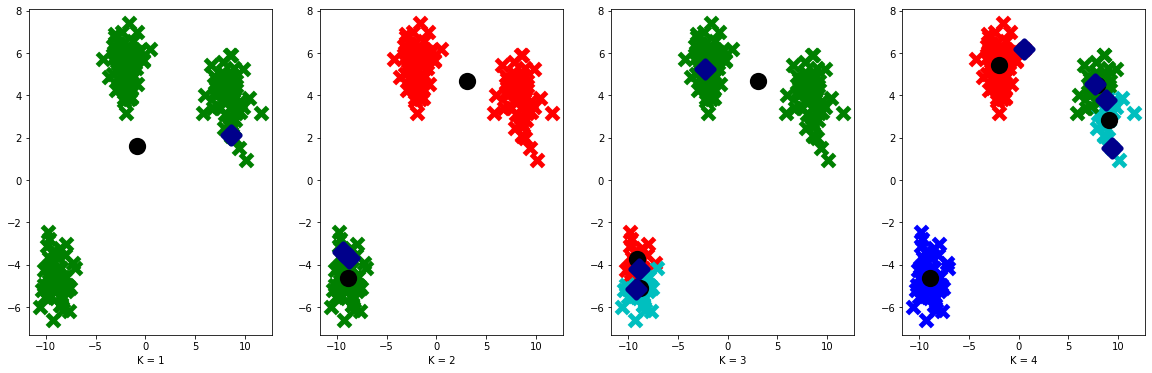

In [24]:
indexs = np.array(indexs)
centroid = np.array(centroid)
orig_centroid = np.array(orig_centroid)
#index = index.item()
Clusters.append(index)


plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plot(data,1,indexs[1],centroid[1],orig_centroid[1])
plt.xlabel("K = 1")
plt.subplot(1,4,2)
plot(data,2,indexs[2],centroid[2],orig_centroid[2])
plt.xlabel("K = 2")
plt.subplot(1,4,3)
plot(data,3,indexs[3],centroid[3],orig_centroid[3])
plt.xlabel("K = 3")
plt.subplot(1,4,4)
plot(data,4,indexs[4],centroid[4],orig_centroid[4])
plt.xlabel("K = 4")